In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [39]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(15,10));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img[:,:,::-1]);
    plt.show()

In [38]:
sudoku = cv2.imread('img/sudoku.png')
sudoku_1 = cv2.imread('img/sudoku_1.png',0)
sudoku_ph = cv2.imread('img/sudoku-photo-2.jpg')
sudoku_ph_1 = cv2.imread('img/sudoku_1.jpg',0)

#gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

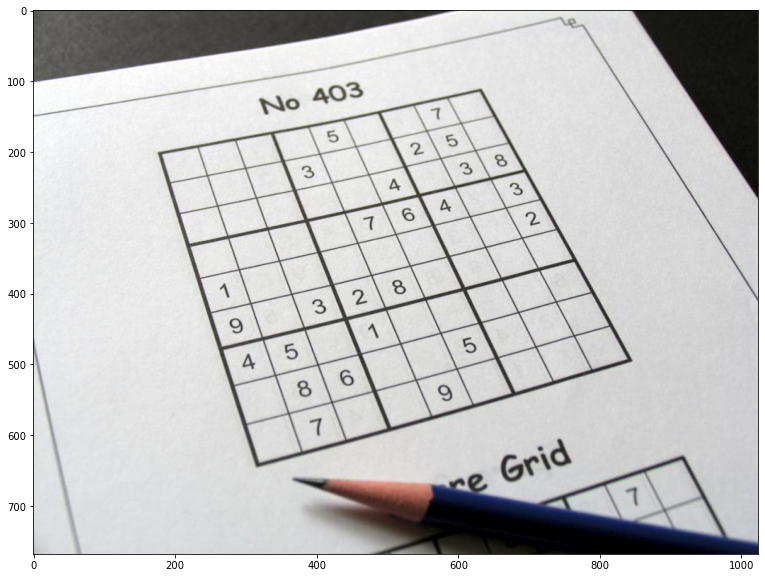

In [41]:
imshow(sudoku_ph)

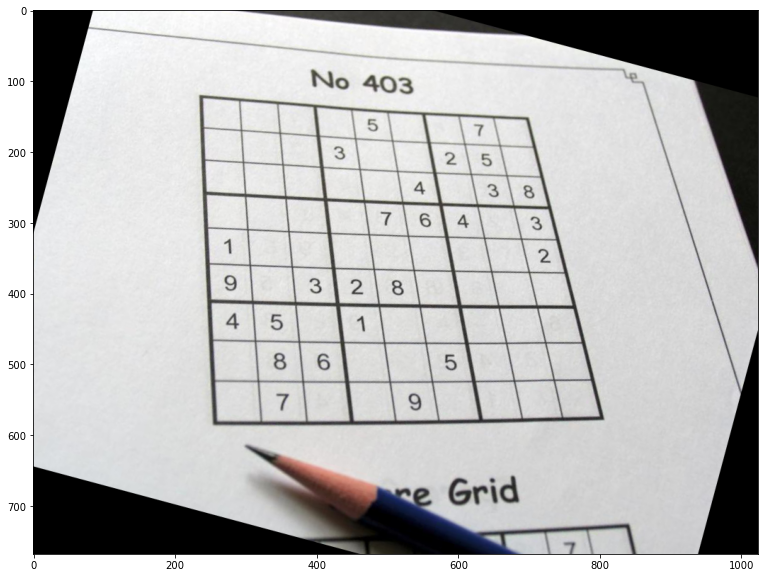

In [42]:
# Create a rotation matrix to rotate the image by 45 degrees (using the center as the pivot point)
h, w = sudoku_ph.shape[:2]

x_center = w//2
y_center = h//2
rotation_matrix = cv2.getRotationMatrix2D((x_center,y_center), -15, 1,)

img_rot = cv2.warpAffine(sudoku_ph,rotation_matrix,(w,h))
imshow(img_rot)

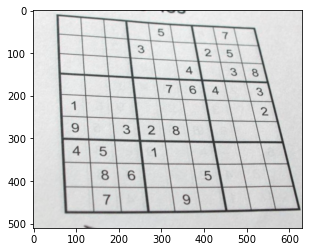

In [43]:
# cropping image
cropped_sudoku = img_rot[110:620,180:810]
imshow(cropped_sudoku, False, False)

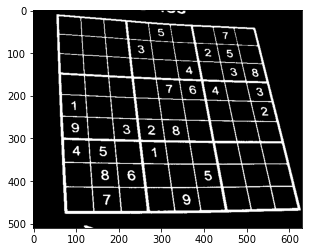

In [52]:
# threshold
cropped_sudoku_gray = cv2.cvtColor(cropped_sudoku,cv2.COLOR_BGR2GRAY)
ret, thr =cv2.threshold(cropped_sudoku_gray,170,255,cv2.THRESH_BINARY_INV)
imshow(thr,False,False)

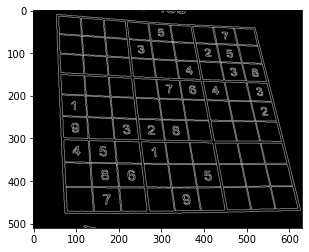

In [53]:
# canny
canny = cv2.Canny(cropped_sudoku_gray,100,200)
imshow(canny,False, False)

In [54]:
# houghlines
lines = cv2.HoughLines(canny,1,np.pi/180,200)
# print(lines)

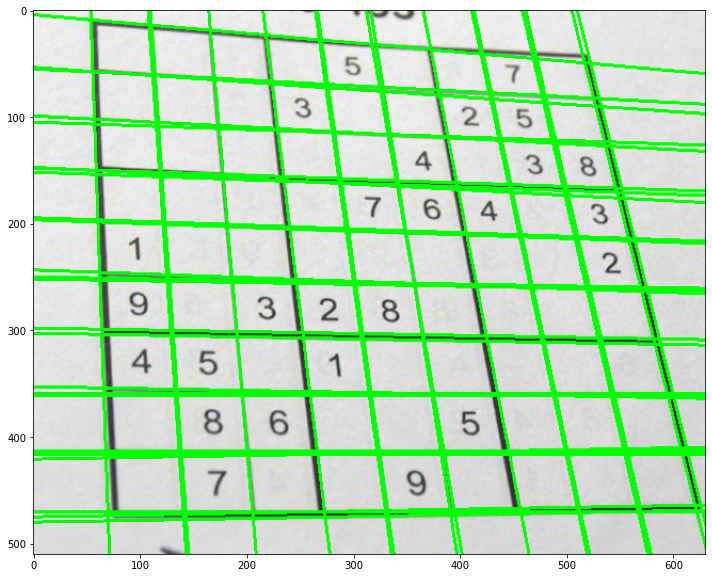

In [55]:
sudoku_copy = cropped_sudoku.copy()
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(sudoku_copy,(x1,y1),(x2,y2),(0,255,0),2)

imshow(sudoku_copy)

# Solving Sudoku